In [128]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [7]:
#BEGIN7
#Will use own grades and moodle logs to merge
# Module 7 has weeks and 14 students grades.14 passed the module with 0 failures.
#Module 7 is a 2nd year group and would be considered more mature and settled.
#The class sizes are very small (<15).Module 7 has two continuous assessments.
#
#

In [6]:
# Begin7 Data Preperation Module 7
# 3 Files in Module 7
# Module 7

module7ml = pd.read_csv('Module7-MoodleLogs.csv')

In [8]:
module7mg = pd.read_csv('Module7-MoodleGrades.csv')

In [9]:
module7og = pd.read_csv('Module7-OwnGrades.csv')

In [10]:
print (module7mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'CA2 - Practical Exam (Real)', 'Quiz: CA3 - Theory Test (Real)', 'Last downloaded from this course']


In [11]:
# Print the number of unique values in each modul7mg column
print(module7mg.nunique())

First name                          14
Surname                             14
ID number                           14
Email address                       14
CA2 - Practical Exam (Real)         14
Quiz: CA3 - Theory Test (Real)      14
Last downloaded from this course     1
dtype: int64


In [12]:
print (module7og.columns.tolist())


['ID number', 'First Name', 'Surname', 'Total CA Mark / 100', 'Final Grade', 'CA1 Report / 20', 'CA2 Lab Test / 35', 'CA3 Theory Test / 35', 'Labs CA / 10', 'Wk1-Lab', 'Wk1-Lecture', 'Wk2-CA / 1', 'Wk2-Lab', 'Wk2-Lecture', 'Wk3-CA / 1', 'Wk3-Lab', 'Wk3-Lecture', 'Wk4-CA / 1', 'Wk4-Lab', 'Wk4-Lecture', 'Wk5-CA / 1.5', 'Wk5-Lab', 'Wk5-Lecture', 'Wk6-CA / 1', 'Wk6-Lab', 'Wk6-Lecture', 'Wk7-CA / 1', 'Wk7-Lab', 'Wk7-Lecture', 'Wk8-CA / 1.5', 'Wk8-Lab', 'Wk8-Lecture', 'Wk9-CA2', 'Wk9-Lecture', 'Wk10-CA / 1', 'Wk10-Lab', 'Wk10-Lecture', 'Wk11-CA / 1', 'Wk11-Lab', 'Wk11-Lecture', 'Wk12-CA3', 'Wk12-Lecture', 'Wk15-Lecture']


In [13]:
module7og.dtypes


ID number                object
First Name               object
Surname                  object
Total CA Mark / 100     float64
Final Grade              object
CA1 Report / 20         float64
CA2 Lab Test / 35       float64
CA3 Theory Test / 35    float64
Labs CA / 10            float64
Wk1-Lab                  object
Wk1-Lecture              object
Wk2-CA / 1                int64
Wk2-Lab                  object
Wk2-Lecture              object
Wk3-CA / 1              float64
Wk3-Lab                  object
Wk3-Lecture              object
Wk4-CA / 1                int64
Wk4-Lab                  object
Wk4-Lecture              object
Wk5-CA / 1.5            float64
Wk5-Lab                  object
Wk5-Lecture              object
Wk6-CA / 1              float64
Wk6-Lab                  object
Wk6-Lecture              object
Wk7-CA / 1              float64
Wk7-Lab                  object
Wk7-Lecture              object
Wk8-CA / 1.5            float64
Wk8-Lab                  object
Wk8-Lect

In [45]:

#Engaged = > 55
engaged7 = module7og['Total CA Mark / 100'] > 55


In [46]:

# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module7og['engaged'] = np.where(module7og['Total CA Mark / 100']>=55, '1', '0')


In [47]:
module7og['engaged'] = pd.to_numeric(module7og['engaged'])


In [48]:
print(module7og['engaged'].value_counts(dropna=False))

1    11
0     3
Name: engaged, dtype: int64


In [49]:
m7og = module7og

In [15]:
#Cleanup7OG

In [16]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk1-Lecture'] = m7og['Wk1-Lecture'].replace({'N': 0 , 'Y': 1})


In [17]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk2-Lecture'] = m7og['Wk2-Lecture'].replace({'N': 0 , 'Y': 1})


In [18]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk3-Lecture'] = m7og['Wk3-Lecture'].replace({'N': 0 , 'Y': 1})


In [19]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk4-Lecture'] = m7og['Wk4-Lecture'].replace({'N': 0 , 'Y': 1})


In [20]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk5-Lecture'] = m7og['Wk5-Lecture'].replace({'N': 0 , 'Y': 1})

In [21]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk6-Lecture'] = m7og['Wk6-Lecture'].replace({'N': 0 , 'Y': 1})

In [22]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk7-Lecture'] = m7og['Wk7-Lecture'].replace({'N': 0 , 'Y': 1})

In [23]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk8-Lecture'] = m7og['Wk8-Lecture'].replace({'N': 0 , 'Y': 1})

In [24]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk9-Lecture'] = m7og['Wk9-Lecture'].replace({'N': 0 , 'Y': 1})

In [25]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk10-Lecture'] = m7og['Wk10-Lecture'].replace({'N': 0 , 'Y': 1})

In [26]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk11-Lecture'] = m7og['Wk11-Lecture'].replace({'N': 0 , 'Y': 1})

In [27]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk12-Lecture'] = m7og['Wk12-Lecture'].replace({'N': 0 , 'Y': 1})

In [28]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk15-Lecture'] = m7og['Wk15-Lecture'].replace({'N': 0 , 'Y': 1})

In [29]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk1-Lab'] = m7og['Wk1-Lab'].replace({'N': 0 , 'Y': 1})

In [30]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk2-Lab'] = m7og['Wk2-Lab'].replace({'N': 0 , 'Y': 1})

In [31]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk3-Lab'] = m7og['Wk3-Lab'].replace({'N': 0 , 'Y': 1})

In [32]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk4-Lab'] = m7og['Wk4-Lab'].replace({'N': 0 , 'Y': 1})

In [33]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk5-Lab'] = m7og['Wk5-Lab'].replace({'N': 0 , 'Y': 1})

In [34]:
# Replace 'no' with 0 and 'yes' with 1 in 'W6-Lecture'  in Module 7

m7og['Wk6-Lab'] = m7og['Wk6-Lab'].replace({'N': 0 , 'Y': 1})

In [35]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk7-Lecture'  in Module 7

m7og['Wk7-Lab'] = m7og['Wk7-Lab'].replace({'N': 0 , 'Y': 1})

In [36]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk8-Lecture'  in Module 7

m7og['Wk8-Lab'] = m7og['Wk8-Lab'].replace({'N': 0 , 'Y': 1})

In [37]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk9-Lecture'  in Module 7

m7og['Wk9-CA2'] = m7og['Wk9-CA2'].replace({'N': 0 , 'Y': 1})

In [38]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk10-Lab'] = m7og['Wk10-Lab'].replace({'N': 0 , 'Y': 1})

In [39]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk11-Lab'] = m7og['Wk11-Lab'].replace({'N': 0 , 'Y': 1})

In [40]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 7

m7og['Wk12-CA3'] = m7og['Wk12-CA3'].replace({'N': 0 , 'Y': 1})

In [50]:
m7og.head(2)

,ID number,First Name,Surname,Total CA Mark / 100,Final Grade,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,...,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture,engaged
0,tzCYvQBD,azCY,bvQB,71.850,B+,8.8,27.650,25.40,10.00,1,...,1.0,1,1,1.00,1,1,1,1,1,1
1,FjdRQnjO,ajdR,bQnj,89.885,A,16.2,30.975,33.05,9.66,1,...,1.0,1,1,0.66,1,1,1,1,1,1


In [51]:
m7og_subset = m7og

In [52]:
m7og_subset.head(2)

,ID number,First Name,Surname,Total CA Mark / 100,Final Grade,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,...,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture,engaged
0,tzCYvQBD,azCY,bvQB,71.850,B+,8.8,27.650,25.40,10.00,1,...,1.0,1,1,1.00,1,1,1,1,1,1
1,FjdRQnjO,ajdR,bQnj,89.885,A,16.2,30.975,33.05,9.66,1,...,1.0,1,1,0.66,1,1,1,1,1,1


In [53]:
#Feature selection7
Xm7og = m7og_subset.iloc[:,5:43]  #independent columns
ym7og = m7og.iloc[:,-1]    #target column i.e engaged


In [54]:
Xm7og.head(2)

,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,Wk1-Lecture,Wk2-CA / 1,Wk2-Lab,Wk2-Lecture,Wk3-CA / 1,...,Wk9-Lecture,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture
0,8.8,27.650,25.40,10.00,1,1,1,1,1,1.0,...,1,1.0,1,1,1.00,1,1,1,1,1
1,16.2,30.975,33.05,9.66,1,1,1,1,1,1.0,...,1,1.0,1,1,0.66,1,1,1,1,1


In [55]:
ym7og.head(2)

0    1
1    1
Name: engaged, dtype: int64

In [56]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xm7og,ym7og)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm7og.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                   Specs      Score
1      CA2 Lab Test / 35  24.183153
0        CA1 Report / 20   6.339336
2   CA3 Theory Test / 35   3.262709
24          Wk8-CA / 1.5   0.502090
3           Labs CA / 10   0.403440
5            Wk1-Lecture   0.282051
26           Wk8-Lecture   0.282051
30              Wk10-Lab   0.223140
18            Wk6-CA / 1   0.164053
20           Wk6-Lecture   0.090909


[ 0.06355866  0.13637894  0.06934732  0.04562831  0.          0.1227972   0.
  0.          0.          0.07391608  0.          0.          0.          0.
  0.          0.06895623  0.          0.          0.07038073  0.          0.
  0.04039368  0.          0.          0.0469697   0.00533023  0.10370629
  0.          0.          0.05656566  0.06074074  0.0020979   0.          0.
  0.          0.          0.          0.03323232]


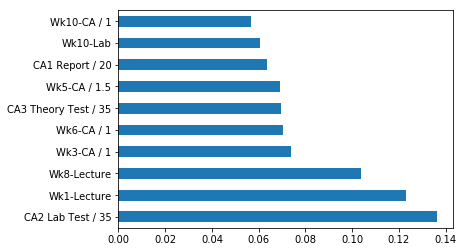

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm7og,ym7og)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm7og.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


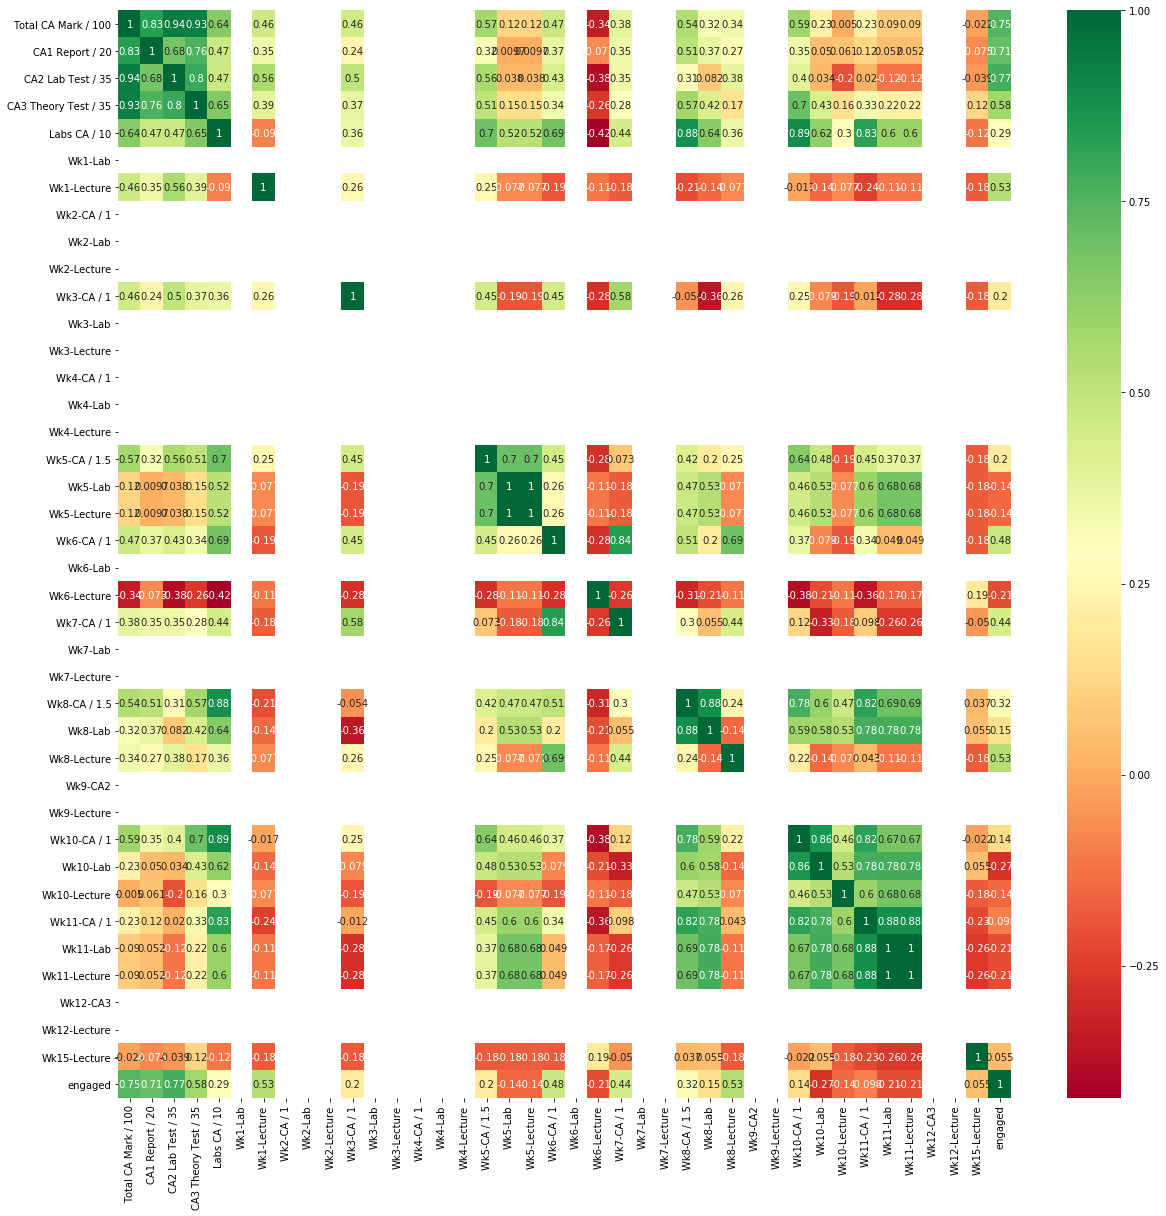

In [58]:
#get correlations of each features in dataset
corrmat = m7og_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m7og_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [59]:
m7og.dtypes


ID number                object
First Name               object
Surname                  object
Total CA Mark / 100     float64
Final Grade              object
CA1 Report / 20         float64
CA2 Lab Test / 35       float64
CA3 Theory Test / 35    float64
Labs CA / 10            float64
Wk1-Lab                   int64
Wk1-Lecture               int64
Wk2-CA / 1                int64
Wk2-Lab                   int64
Wk2-Lecture               int64
Wk3-CA / 1              float64
Wk3-Lab                   int64
Wk3-Lecture               int64
Wk4-CA / 1                int64
Wk4-Lab                   int64
Wk4-Lecture               int64
Wk5-CA / 1.5            float64
Wk5-Lab                   int64
Wk5-Lecture               int64
Wk6-CA / 1              float64
Wk6-Lab                   int64
Wk6-Lecture               int64
Wk7-CA / 1              float64
Wk7-Lab                   int64
Wk7-Lecture               int64
Wk8-CA / 1.5            float64
Wk8-Lab                   int64
Wk8-Lect

In [60]:
# Print the number of unique values in each modul7og column
print(module7og.nunique())

ID number               14
First Name              14
Surname                 14
Total CA Mark / 100     14
Final Grade              6
CA1 Report / 20         10
CA2 Lab Test / 35       14
CA3 Theory Test / 35    14
Labs CA / 10            10
Wk1-Lab                  1
Wk1-Lecture              2
Wk2-CA / 1               1
Wk2-Lab                  1
Wk2-Lecture              1
Wk3-CA / 1               3
Wk3-Lab                  1
Wk3-Lecture              1
Wk4-CA / 1               1
Wk4-Lab                  1
Wk4-Lecture              1
Wk5-CA / 1.5             3
Wk5-Lab                  2
Wk5-Lecture              2
Wk6-CA / 1               3
Wk6-Lab                  1
Wk6-Lecture              2
Wk7-CA / 1               2
Wk7-Lab                  1
Wk7-Lecture              1
Wk8-CA / 1.5             4
Wk8-Lab                  2
Wk8-Lecture              2
Wk9-CA2                  1
Wk9-Lecture              1
Wk10-CA / 1              5
Wk10-Lab                 2
Wk10-Lecture             2
W

In [61]:
# Print the number of unique values in each modul6mg column
print(module7ml.nunique())

Time              1369
User full name      14
Affected user        1
Event context       43
ct                  10
Event name          27
Description         70
Origin               1
IP address           1
dtype: int64


In [62]:
# Cleanup7


In [63]:
#time7
time7 = module7ml["Time"].str.split(",", n = 1, expand = True)

In [64]:
# making separate Date column from new data frame 
module7ml["Date"]= time7[0] 

# making seperate Time column from new data frame
module7ml['Time']= time7[1]


In [65]:
# Convert the date column to datetime64
module7ml.Date = pd.to_datetime(module7ml.Date)

In [66]:
# new data frame with split value columns 
new7 = module7ml["User full name"].str.split(" ", n = 1, expand = True)


In [67]:
# making separate first name column from new data frame 
module7ml["First name"]= new7[0] 

# making separate last name column from new data frame 
module7ml["Last name"]= new7[1] 


In [68]:
module7ml.head(2)

,Time,User full name,Affected user,Event context,ct,Event name,Description,Origin,IP address,Date,First name,Last name
0,15:46,am5M b1HG,-,Course: Module 7,System,Course viewed,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG
1,05:48,am5M b1HG,-,Course: Module 7,User report,Grade user report viewed,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG


In [69]:
module7ml.drop(module7ml[['IP address','Origin','Description','Affected user']], axis=1)

,Time,User full name,Event context,ct,Event name,Date,First name,Last name
0,15:46,am5M b1HG,Course: Module 7,System,Course viewed,2019-01-18,am5M,b1HG
1,05:48,am5M b1HG,Course: Module 7,User report,Grade user report viewed,2019-01-15,am5M,b1HG
2,05:48,am5M b1HG,Course: Module 7,System,Course viewed,2019-01-15,am5M,b1HG
3,15:59,ajdR bQnj,Course: Module 7,System,Course viewed,2019-12-01,ajdR,bQnj
4,15:59,ajdR bQnj,Course: Module 7,User report,Grade user report viewed,2019-12-01,ajdR,bQnj
5,15:59,ajdR bQnj,Course: Module 7,System,Course viewed,2019-12-01,ajdR,bQnj
6,02:44,am5M b1HG,Course: Module 7,User report,Grade user report viewed,2019-12-01,am5M,b1HG
7,02:44,am5M b1HG,Course: Module 7,System,Course viewed,2019-12-01,am5M,b1HG
8,13:12,ajdR bQnj,Course: Module 7,System,Badge listing viewed,2019-11-01,ajdR,bQnj
9,13:12,ajdR bQnj,Course: Module 7,User report,Grade user report viewed,2019-11-01,ajdR,bQnj


In [70]:
module7ml.head(2)

,Time,User full name,Affected user,Event context,ct,Event name,Description,Origin,IP address,Date,First name,Last name
0,15:46,am5M b1HG,-,Course: Module 7,System,Course viewed,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG
1,05:48,am5M b1HG,-,Course: Module 7,User report,Grade user report viewed,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG


In [71]:
# Onehot7
module7ml_onehot = module7ml.copy()
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['Event name'], prefix = ['Event name'])
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['Event context'], prefix = ['Event context'])
module7ml_onehot = pd.get_dummies(module7ml_onehot, columns=['ct'], prefix = ['ct'])


print(module7ml_onehot.head())


     Time User full name Affected user  \
0   15:46      am5M b1HG             -   
1   05:48      am5M b1HG             -   
2   05:48      am5M b1HG             -   
3   15:59      ajdR bQnj             -   
4   15:59      ajdR bQnj             -   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   
2  The user with id '0' viewed the course with id...    web  127.0.0.1   
3  The user with id '0' viewed the course with id...    web  127.0.0.1   
4  The user with id '0' viewed the user report in...    web  127.0.0.1   

        Date First name Last name  Event name_A file has been uploaded.  \
0 2019-01-18       am5M      b1HG                                     0   
1 2019-01-15       am5M      b1HG                                     0   
2 2019-01-15       am5M      b1HG                                     0   
3 

In [72]:
module7ml_onehot.head(2)

,Time,User full name,Affected user,Description,Origin,IP address,Date,First name,Last name,Event name_A file has been uploaded.,...,ct_Assignment,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report
0,15:46,am5M b1HG,-,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG,0,...,0,0,0,0,0,0,1,0,0,0
1,05:48,am5M b1HG,-,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
module7ml_onehot.drop(module7ml_onehot[['IP address','Origin','Description','Affected user']], axis=1)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Add Submission,Event name_Badge listing viewed,Event name_Course module instance list viewed,...,ct_Assignment,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report
0,15:46,am5M b1HG,2019-01-18,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,05:48,am5M b1HG,2019-01-15,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,05:48,am5M b1HG,2019-01-15,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,15:59,ajdR bQnj,2019-12-01,ajdR,bQnj,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,15:59,ajdR bQnj,2019-12-01,ajdR,bQnj,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,15:59,ajdR bQnj,2019-12-01,ajdR,bQnj,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,02:44,am5M b1HG,2019-12-01,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,02:44,am5M b1HG,2019-12-01,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,13:12,ajdR bQnj,2019-11-01,ajdR,bQnj,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,13:12,ajdR bQnj,2019-11-01,ajdR,bQnj,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
module7ml_onehot.head(2)

,Time,User full name,Affected user,Description,Origin,IP address,Date,First name,Last name,Event name_A file has been uploaded.,...,ct_Assignment,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report
0,15:46,am5M b1HG,-,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG,0,...,0,0,0,0,0,0,1,0,0,0
1,05:48,am5M b1HG,-,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
m7ml_subset = module7ml.drop(module7ml[['IP address','Origin','Description','Affected user']], axis=1)

In [75]:
m7ml_subset.head(2)

,Time,User full name,Event context,ct,Event name,Date,First name,Last name
0,15:46,am5M b1HG,Course: Module 7,System,Course viewed,2019-01-18,am5M,b1HG
1,05:48,am5M b1HG,Course: Module 7,User report,Grade user report viewed,2019-01-15,am5M,b1HG


In [78]:
m7og_subset.head(2)

,ID number,First Name,Surname,Total CA Mark / 100,Final Grade,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,...,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture,engaged
0,tzCYvQBD,azCY,bvQB,71.850,B+,8.8,27.650,25.40,10.00,1,...,1.0,1,1,1.00,1,1,1,1,1,1
1,FjdRQnjO,ajdR,bQnj,89.885,A,16.2,30.975,33.05,9.66,1,...,1.0,1,1,0.66,1,1,1,1,1,1


In [79]:

# Rename the columns of df2_melted: df2_tidy
m7og_subset_tidy = m7og_subset.rename(columns = {'First Name': 'First name',}, inplace = False)


In [80]:
m7og_subset_tidy.head(2)

,ID number,First name,Surname,Total CA Mark / 100,Final Grade,CA1 Report / 20,CA2 Lab Test / 35,CA3 Theory Test / 35,Labs CA / 10,Wk1-Lab,...,Wk10-CA / 1,Wk10-Lab,Wk10-Lecture,Wk11-CA / 1,Wk11-Lab,Wk11-Lecture,Wk12-CA3,Wk12-Lecture,Wk15-Lecture,engaged
0,tzCYvQBD,azCY,bvQB,71.850,B+,8.8,27.650,25.40,10.00,1,...,1.0,1,1,1.00,1,1,1,1,1,1
1,FjdRQnjO,ajdR,bQnj,89.885,A,16.2,30.975,33.05,9.66,1,...,1.0,1,1,0.66,1,1,1,1,1,1


In [81]:
len(m7og_subset_tidy)

14

In [82]:
#Mergesub7
merge_subset7 = pd.merge(module7ml_onehot,m7og_subset_tidy[['First name','engaged']],on='First name', how='left')

In [83]:
merge_subset7.head(2)

,Time,User full name,Affected user,Description,Origin,IP address,Date,First name,Last name,Event name_A file has been uploaded.,...,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report,engaged
0,15:46,am5M b1HG,-,The user with id '0' viewed the course with id...,web,127.0.0.1,2019-01-18,am5M,b1HG,0,...,0,0,0,0,0,1,0,0,0,1
1,05:48,am5M b1HG,-,The user with id '0' viewed the user report in...,web,127.0.0.1,2019-01-15,am5M,b1HG,0,...,0,0,0,0,0,0,0,0,1,1


In [84]:
merge_subset7 = merge_subset7.drop(merge_subset7[['IP address','Origin','Description','Affected user']], axis=1)

In [85]:
merge_subset7.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Add Submission,Event name_Badge listing viewed,Event name_Course module instance list viewed,...,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report,engaged
0,15:46,am5M b1HG,2019-01-18,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,05:48,am5M b1HG,2019-01-15,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [86]:
merge_subset7.dtypes

Time                                                                         object
User full name                                                               object
Date                                                                 datetime64[ns]
First name                                                                   object
Last name                                                                    object
Event name_A file has been uploaded.                                          uint8
Event name_A submission has been submitted.                                   uint8
Event name_Add Submission                                                     uint8
Event name_Badge listing viewed                                               uint8
Event name_Course module instance list viewed                                 uint8
Event name_Course module viewed                                               uint8
Event name_Course user report viewed                                        

In [87]:
merge_subset7.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Add Submission,Event name_Badge listing viewed,Event name_Course module instance list viewed,...,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report,engaged
0,15:46,am5M b1HG,2019-01-18,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,05:48,am5M b1HG,2019-01-15,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [88]:
len(merge_subset7)

3167

In [89]:
merge_subset7.head(6)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Add Submission,Event name_Badge listing viewed,Event name_Course module instance list viewed,...,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report,engaged
0,15:46,am5M b1HG,2019-01-18,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,05:48,am5M b1HG,2019-01-15,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,05:48,am5M b1HG,2019-01-15,am5M,b1HG,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,15:59,ajdR bQnj,2019-12-01,ajdR,bQnj,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,15:59,ajdR bQnj,2019-12-01,ajdR,bQnj,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5,15:59,ajdR bQnj,2019-12-01,ajdR,bQnj,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [90]:
#Feature selection
X7s = merge_subset7.iloc[:,5:85]  #independent columns
y7s = merge_subset7.iloc[:,-1]    #target column i.e engaged


In [91]:
X7s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Add Submission,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,...,ct_Assignment,ct_File,ct_File submissions,ct_Forum,ct_Overview report,ct_Quiz,ct_System,ct_Turnitin Assignment 2,ct_URL,ct_User report
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
y7s.head(6)

0    1
1    1
2    1
3    1
4    1
5    1
Name: engaged, dtype: int64

In [93]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X7s,y7s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X7s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
10                Event name_Grade user report viewed  13.218453
79                                     ct_User report  13.218453
29                     Event context_Course: Module 7  11.446439
11                        Event name_List Submissions   9.813853
67  Event context_Turnitin Assignment 2: CA1 -SPCD...   9.141172
77                           ct_Turnitin Assignment 2   9.141172
52                 Event context_File: Lecture 10 - S   6.647707
7                            Event name_Course viewed   5.997823
76                                          ct_System   5.574013
12                   Event name_Quiz attempt reviewed   4.894887


[ 0.00090602  0.00242409  0.00202112  0.00777945  0.00463985  0.02636843
  0.0126032   0.04205216  0.00517526  0.01082829  0.04374045  0.0131438
  0.04736432  0.00056115  0.00012092  0.00053041  0.0193596   0.00146382
  0.00113218  0.00215941  0.00904158  0.00215621  0.00246732  0.00122545
  0.00135171  0.00532643  0.00201257  0.00477664  0.00684581  0.05376571
  0.01019806  0.00134709  0.02128179  0.00370486  0.00674988  0.0128609
  0.00143956  0.00731339  0.00770521  0.00063187  0.00202394  0.00771356
  0.0425327   0.03310286  0.00058207  0.00174315  0.02456275  0.00067099
  0.02074865  0.01635122  0.00242032  0.00116948  0.0646815   0.00608738
  0.0001185   0.00149271  0.01540916  0.02016308  0.0033222   0.00233734
  0.02633542  0.00673397  0.00917829  0.03553387  0.003729    0.00315696
  0.01442692  0.02777452  0.01219249  0.0073701   0.00873568  0.01282637
  0.00666588  0.0044655   0.00424236  0.00796785  0.02083609  0.05793167
  0.01540974  0.0406778 ]


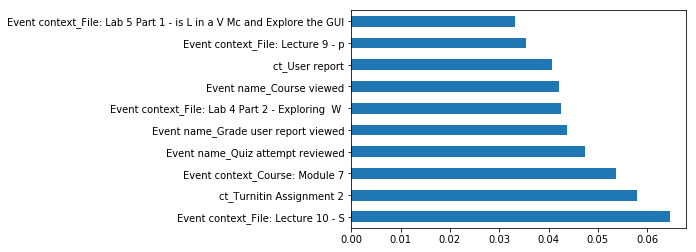

In [94]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X7s,y7s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X7s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


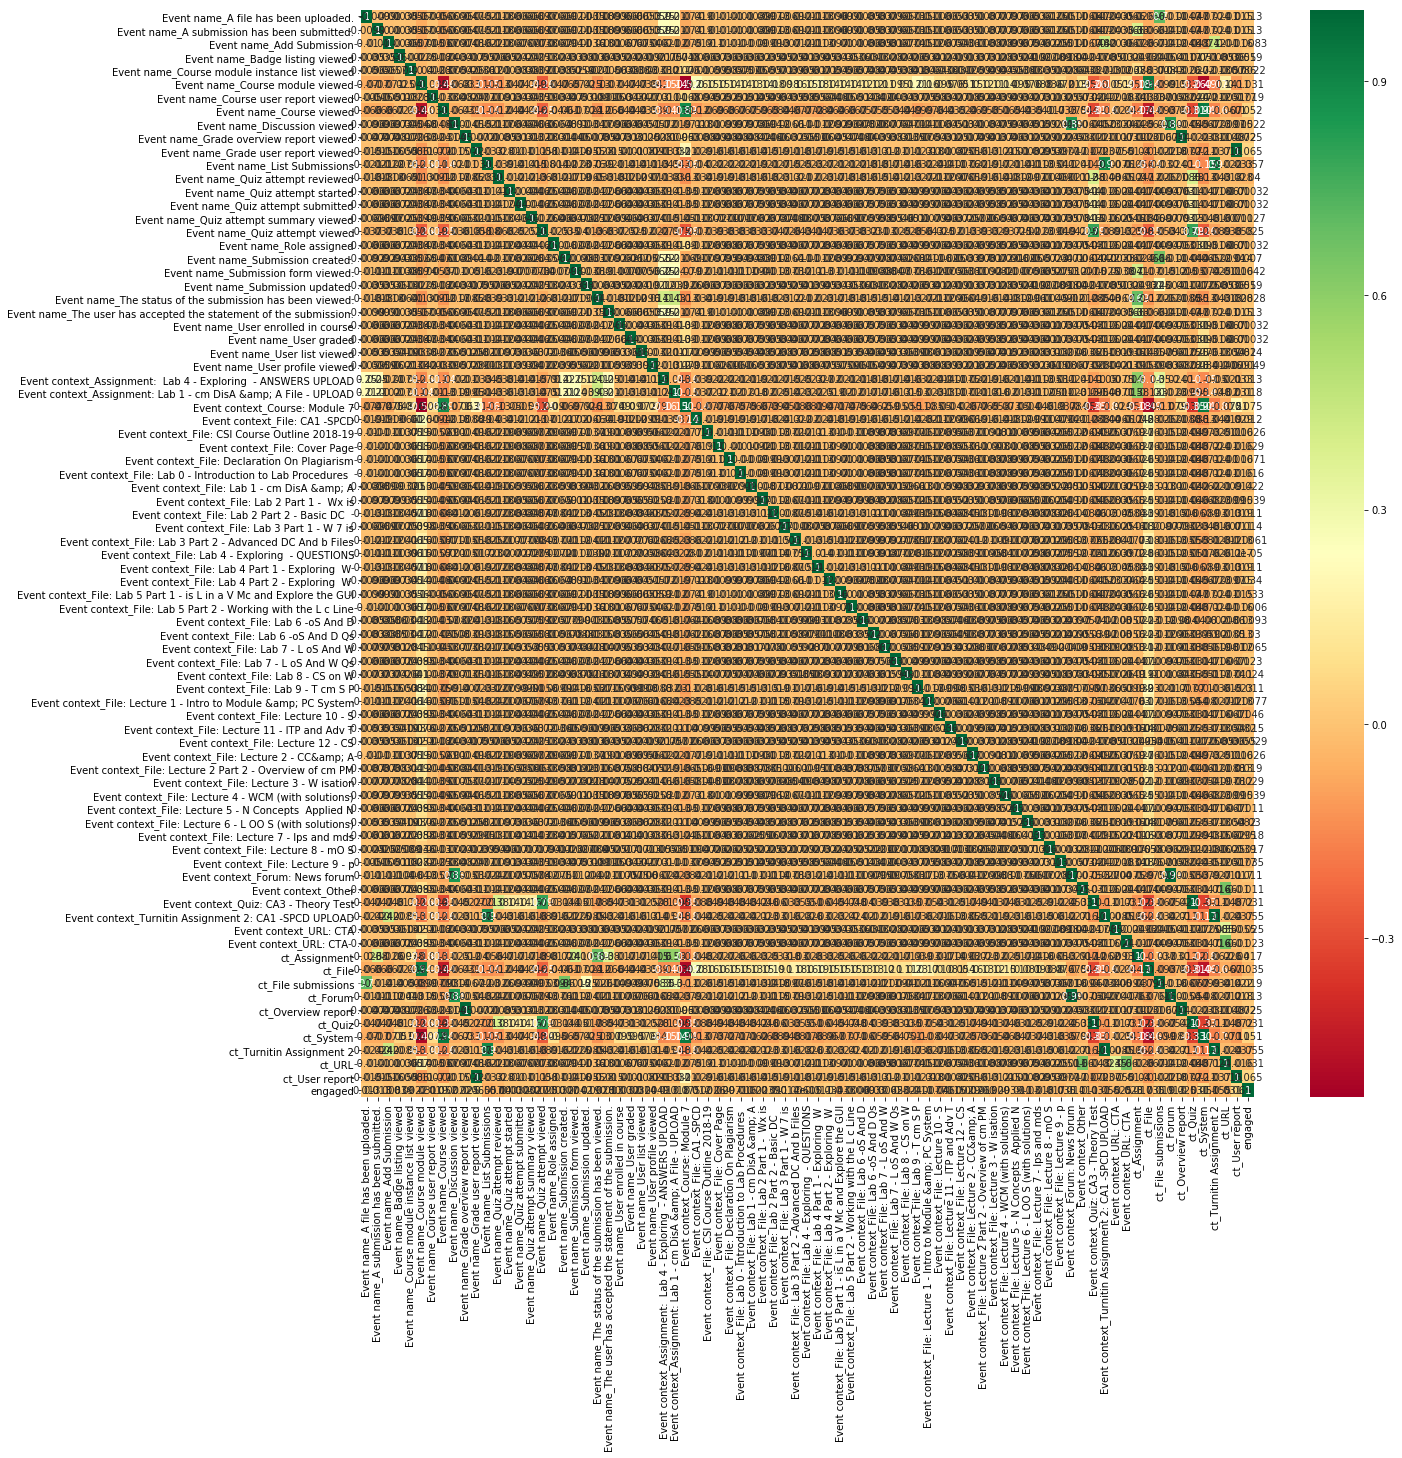

In [95]:
#get correlations of each features in dataset
corrmat = merge_subset7.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset7[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [96]:
X7s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_Add Submission', 'Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed',
       'Event name_Grade overview report viewed',
       'Event name_Grade user report viewed', 'Event name_List Submissions',
       'Event name_Quiz attempt reviewed', 'Event name_Quiz attempt started',
       'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the 

In [97]:
featselect7 = X7s[['Event name_Grade user report viewed','ct_User report','Event context_Course: Module 7','Event name_List Submissions','Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD','ct_Turnitin Assignment 2','Event context_File: Lecture 10 - S','Event name_Course viewed','ct_System','Event name_Quiz attempt reviewed']]

In [98]:
# EndofFS7
# 10                Event name_Grade user report viewed  13.218453
#79                                     ct_User report  13.218453
#29                     Event context_Course: Module 7  11.446439
#11                        Event name_List Submissions   9.813853
#67  Event context_Turnitin Assignment 2: CA1 -SPCD...   9.141172
#77                           ct_Turnitin Assignment 2   9.141172
#52                 Event context_File: Lecture 10 - S   6.647707
#7                            Event name_Course viewed   5.997823
#76                                          ct_System   5.574013
#12                   Event name_Quiz attempt reviewed   4.894887
#

In [99]:
featselect7.head(2)

,Event name_Grade user report viewed,ct_User report,Event context_Course: Module 7,Event name_List Submissions,Event context_Turnitin Assignment 2: CA1 -SPCD UPLOAD,ct_Turnitin Assignment 2,Event context_File: Lecture 10 - S,Event name_Course viewed,ct_System,Event name_Quiz attempt reviewed
0,0,0,1,0,0,0,0,1,1,0
1,1,1,1,0,0,0,0,0,0,0


In [100]:
Xfs7 = featselect7 # Features
yfs7 = y7s # Target variable


In [101]:

# Split dataset into training set and test set
Xfs7_train, Xfs7_test, yfs7_train, yfs7_test = train_test_split(Xfs7, yfs7, test_size=0.3, random_state=1) # 70% training and 30% test


In [102]:
# Create Decision Tree classifer object
dtclffs7 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs7 = dtclffs7.fit(Xfs7_train,yfs7_train)

#Predict the response for test dataset
yfs7_pred = dtclffs7.predict(Xfs7_test)


In [120]:
cvscores_10dt = cross_val_score(dtclffs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10dt))

0.788812448812


In [121]:
# Instantiate the classifier
rfclffs7 = RandomForestClassifier()

# Fit to the training data
rfclffs7.fit(Xfs7_train, yfs7_train)

# Compute accuracy
print(rfclffs7.score(Xfs7_test, yfs7_test))


0.77181913775


In [122]:
cvscores_10rf = cross_val_score(rfclffs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10rf))

0.788812448812


In [123]:
from sklearn.svm import SVC

svcfs7 = SVC()

#Train it, or "fit it", to the data:
svcfs7.fit(Xfs7_train, yfs7_train)

# Compute accuracy
print(svcfs7.score(Xfs7_test, yfs7_test))


0.77181913775


In [124]:
cvscores_10svc = cross_val_score(svcfs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10svc))

0.788812448812


In [125]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs7 = LogisticRegression()

# fit the model with data
logregfs7.fit(Xfs7_train,yfs7_train)

#
ylg7_pred=logregfs7.predict(Xfs7_test)


In [126]:
cvscores_10 = cross_val_score(logregfs7, Xfs7_train, yfs7_train, cv = 10)
print(np.mean(cvscores_10))

0.788812448812


In [103]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs7_test, yfs7_pred))


Accuracy: 0.77181913775


In [104]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs7_test, yfs7_pred))


0.77181913775


In [105]:
# Import recall_score - Perfect recall score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs7_test, yfs7_pred))


1.0


In [106]:
print("Accuracy:",metrics.accuracy_score(yfs7_test, yfs7_pred))
print("Precision:",metrics.precision_score(yfs7_test, yfs7_pred))
print("Recall:",metrics.recall_score(yfs7_test, yfs7_pred))
print("F1 Score",metrics.f1_score(yfs7_test, yfs7_pred))


Accuracy: 0.77181913775
Precision: 0.77181913775
Recall: 1.0
F1 Score 0.871216617211


In [107]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs7_test, yfs7_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs7_test, yfs7_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs7_test, yfs7_pred)))

Mean Absolute Error: 0.22818086225
Mean Squared Error: 0.22818086225
Root Mean Squared Error: 0.47768280506


In [108]:
len(m7ml_subset)

3167

In [109]:
#timeedit7
mask7 = (m7ml_subset['Date'] >= StartDate) & (m7ml_subset['Date'] <= EndDate)

m7ml_subset = m7ml_subset.loc[mask7]

len(m7ml_subset)


2420

In [110]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_7 = (module7ml['Date'] >= StartDate) & (module7ml['Date'] <= TriOne)

FirstFive7 = module7ml.loc[week5_7]
len(FirstFive7)


1605

In [111]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_7 = (module7ml['Date'] >= TriOne) & (module7ml['Date'] <= TriTwo)

FirstTen7 = module7ml.loc[week10_7]

len(FirstTen7)


1019

In [112]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_7 = (module7ml['Date'] >= TriTwo) & (module7ml['Date'] <= EndDate)

FirstFivt7 = module7ml.loc[week15_7]

len(FirstFivt7)


214

In [113]:
m7ml_subset.head()

,Time,User full name,Event context,ct,Event name,Date,First name,Last name
0,15:46,am5M b1HG,Course: Module 7,System,Course viewed,2019-01-18,am5M,b1HG
1,05:48,am5M b1HG,Course: Module 7,User report,Grade user report viewed,2019-01-15,am5M,b1HG
2,05:48,am5M b1HG,Course: Module 7,System,Course viewed,2019-01-15,am5M,b1HG
45,21:03,ajdR bQnj,Course: Module 7,System,Course viewed,2018-12-30,ajdR,bQnj
46,16:11,am5M b1HG,Course: Module 7,System,Course viewed,2018-12-28,am5M,b1HG


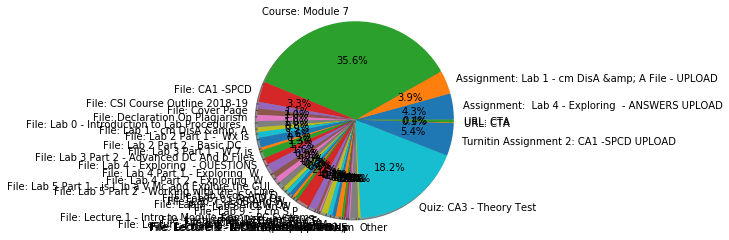

In [114]:
labels = module7ml['Event context'].astype('category').cat.categories.tolist()
counts = module7ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

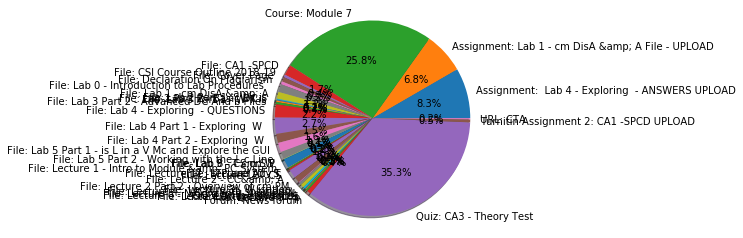

In [115]:
labels = FirstFive7['Event context'].astype('category').cat.categories.tolist()
counts = FirstFive7['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [116]:
module7ml["Event context"].value_counts()


Course: Module 7                                           1127
Quiz: CA3 - Theory Test                                     576
Turnitin Assignment 2: CA1 -SPCD UPLOAD                     170
Assignment:  Lab 4 - Exploring  - ANSWERS UPLOAD            136
Assignment: Lab 1 - cm DisA &amp; A File - UPLOAD           123
File: CA1 -SPCD                                             106
File: Lab 9 - T cm S P                                       69
File: Lab 2 Part 2 - Basic DC                                50
File: Lab 4 Part 1 - Exploring  W                            50
File: Lab 3 Part 2 - Advanced DC And b Files                 42
File: Lecture 1 - Intro to Module &amp; PC System            41
Forum: News forum                                            40
File: Lab 4 - Exploring  - QUESTIONS                         37
File: CSI Course Outline 2018-19                             34
File: Lecture 2 - CC&amp; A                                  34
File: Cover Page                        

In [117]:
FirstFive7["Event context"].value_counts()


Quiz: CA3 - Theory Test                                    566
Course: Module 7                                           414
Assignment:  Lab 4 - Exploring  - ANSWERS UPLOAD           134
Assignment: Lab 1 - cm DisA &amp; A File - UPLOAD          109
File: Lab 4 Part 1 - Exploring  W                           43
File: Lab 4 - Exploring  - QUESTIONS                        35
File: CA1 -SPCD                                             28
File: Lab 5 Part 1 - is L in a V Mc and Explore the GUI     25
File: Lecture 1 - Intro to Module &amp; PC System           24
File: Lab 4 Part 2 - Exploring  W                           24
File: Lecture 2 - CC&amp; A                                 23
File: Lab 0 - Introduction to Lab Procedures                21
File: Lab 5 Part 2 - Working with the L c Line              19
File: Lab 1 - cm DisA &amp; A                               18
File: Lecture 2 Part 2 - Overview of cm PM                  16
File: Cover Page                                       

In [118]:
module7ml["Event name"].value_counts()


Course module viewed                                      1048
Course viewed                                              963
Quiz attempt viewed                                        390
List Submissions                                           138
Quiz attempt reviewed                                      101
The status of the submission has been viewed.              100
Grade user report viewed                                    73
Submission form viewed.                                     35
Add Submission                                              32
A file has been uploaded.                                   31
A submission has been submitted.                            31
The user has accepted the statement of the submission.      31
Discussion viewed                                           29
Submission created.                                         27
Quiz attempt summary viewed                                 15
Role assigned                                          

In [119]:
FirstFive7["Event name"].value_counts()


Course module viewed                                      407
Quiz attempt viewed                                       390
Course viewed                                             344
Quiz attempt reviewed                                      94
The status of the submission has been viewed.              84
Submission form viewed.                                    35
A file has been uploaded.                                  31
A submission has been submitted.                           31
The user has accepted the statement of the submission.     31
Submission created.                                        27
Quiz attempt summary viewed                                15
Quiz attempt started                                       14
Quiz attempt submitted                                     14
User graded                                                14
User enrolled in course                                    13
Role assigned                                              13
Grade us